Echantillonage 2D
========
TP1 séance 2-3
========
--------
nom1
safwane
nom2
ricardo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

%matplotlib inline

img_cercles = cv2.imread('imageCercles.png',0)
img_sinus = cv2.imread('imageSinus.png',0)

 1) Programmez la decimation:
 
   Faire une fonction pour la decimation.
   
   Appliquer la fonction de decimation et montrer les images avant et apres decimation.

In [3]:
# La fonction déciamtion conserve un pixel sur i horizontalement et un pixel sur j verticalement
def decimation(img,i,j):
    (lignes,colonnes)= img.shape
    return img[1:lignes:i,1:colonnes:j]




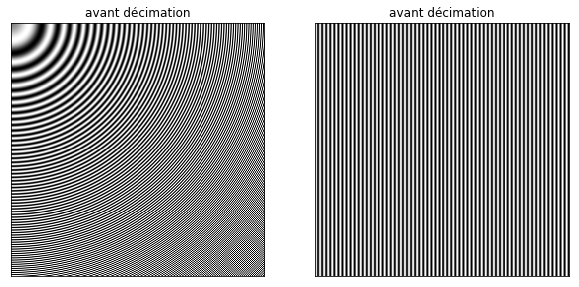

In [4]:
# On affiche l'image des cercles et du sinus avant décimation

plt.figure(2,figsize = (10,10))

plt.subplot(121)
plt.imshow(img_cercles, cmap = 'gray')
plt.title('avant décimation')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_sinus, cmap = 'gray')
plt.title('avant décimation')
plt.xticks([]), plt.yticks([])

plt.show()

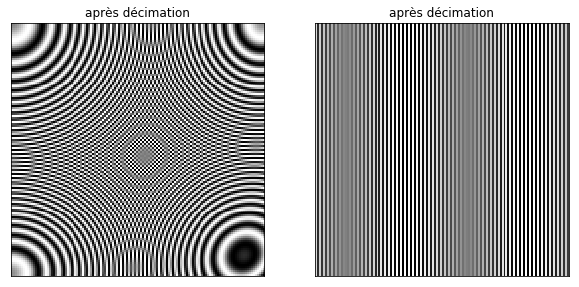

In [5]:
# On applique la fonction de décimation sur l'image des cercles et du sinus et on les affiche

plt.figure(2,figsize = (10,10))

img_cercles_sampled_4 = decimation(img_cercles,4,4)

plt.subplot(121)
plt.imshow(img_cercles_sampled_4, cmap = 'gray')
plt.title('après décimation')
plt.xticks([]), plt.yticks([])

img_sinus_sampled_4 = decimation(img_sinus,4,4)

plt.subplot(122)
plt.imshow(img_sinus_sampled_4, cmap = 'gray')
plt.title('après décimation')
plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
# Explication : Nous avons perdu de l'information car nous avons supprimer des données pour que la mémoire de stockage 
# de l'image soit réduit
# Nous avons perdu en résolution

2) Examinez le contenu de l’image du sinus avant et après décimation dans le domaine spectral. Indiquez
le phénomène en termes mathématiques.

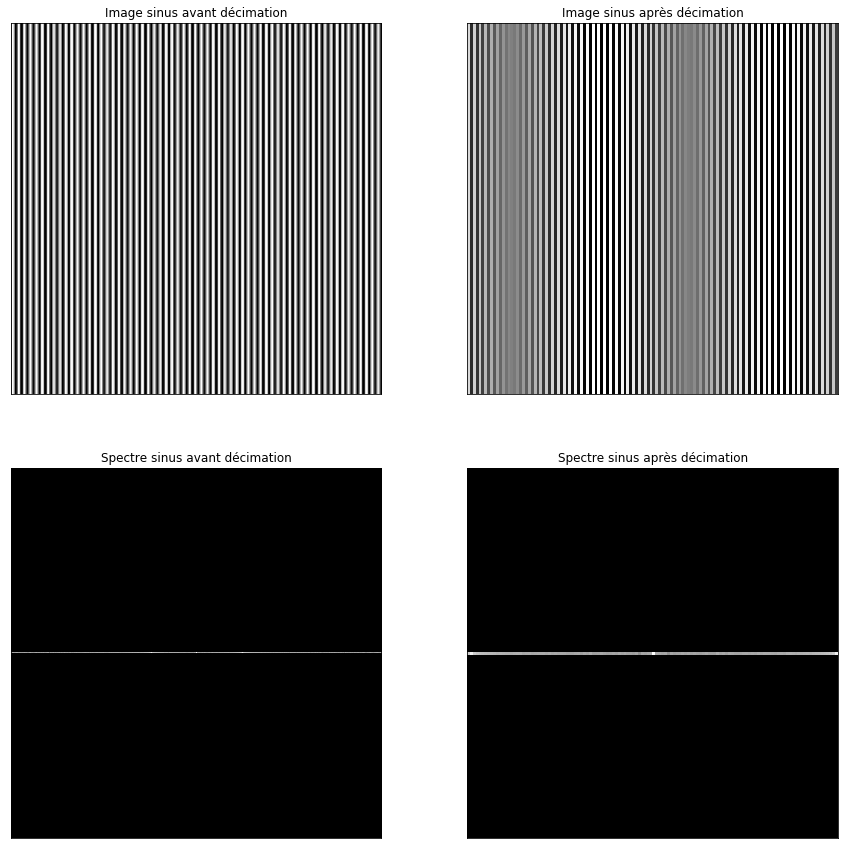

In [7]:
# On passe dans le domaine spectral

fsinus = np.fft.fft2(img_sinus)
fsinus_shift = np.fft.fftshift(fsinus)
spectre_sinus = 20*np.log(np.abs(fsinus_shift)+0.001)

fsinus_sampled = np.fft.fft2(img_sinus_sampled_4)
fsinus_sampled_shift = np.fft.fftshift(fsinus_sampled)
spectre_sinus2 = 20*np.log(np.abs(fsinus_sampled_shift)+0.001)


plt.figure(4,figsize = (15,15))
plt.subplot(221),plt.imshow(img_sinus, cmap = 'gray')
plt.title('Image sinus avant décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_sinus_sampled_4, cmap = 'gray')
plt.title('Image sinus après décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(spectre_sinus, cmap = 'gray')
plt.title('Spectre sinus avant décimation'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(spectre_sinus2, cmap = 'gray')
plt.title('Spectre sinus après décimation'), plt.xticks([]), plt.yticks([])
plt.show()

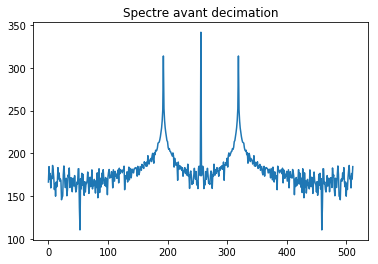

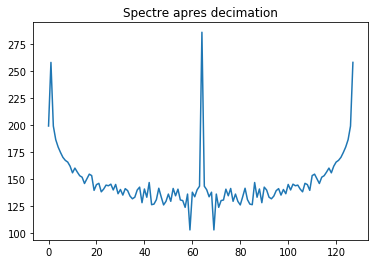

In [8]:

x1 = [i for i in range(512)]
y1 = [spectre_sinus[256,i]for i in range(512)]

x2 = [i for i in range(128)]
y2 = [spectre_sinus2[64,i]for i in range(128)]

plt.plot(x1,y1)
plt.title('Spectre avant decimation')
plt.show()
    
plt.plot(x2,y2)
plt.title('Spectre apres decimation')
plt.show()

In [9]:
# Explication : Après décimation on voit toujours 3 diracs mais pas à la même position.
# Ces 3 dirac sont plus écartés de la fréquence 0Hz.
# C'est pour cela que le spectre a été modifié. 
# En effet après la décimation la fréquence du signal a augmenté à cause des variations plus fortes du signal


3). Proposez un filtre naïf dans le domaine spectral pour éviter le phénomène observé.

4)Commentez la méthode proposée. Les résultats obtenus présentent-ils des dégradations visibles ? Proposer une explication pour le nouveau phénomène observé.


5)Proposez un ou plusieurs filtres qui permettent d’effectuer une décimation avec des défauts
presque négligeables.
